<a href="https://colab.research.google.com/github/Gustavo-2212/Ciencia-de-Dados-Aplicacao-2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Projeto de Ciência de Dados**
* Criação de um modelo de previsão de vendas (valores) a 
partir de investimentos feitos em três canais de comunicação, a saber TV, Rádio e Jornal

# **Primeiros Passos**

* Importando a biblioteca pandas e capturando/visualizando os dados do arquivo inicial sobre vendas e investimentos passados.


In [2]:
import pandas as pd

bd = pd.read_csv('/content/drive/MyDrive/PYTHON - Intensivão/Aula 07/advertising.csv')

display(bd.info())
display(bd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


* Importando as bibliotecas [Seaborn](https://seaborn.pydata.org/) e [Matplotlib](https://matplotlib.org/) para ajudar na construção dos gráficos para análise dos dados; e plotando os gráficos




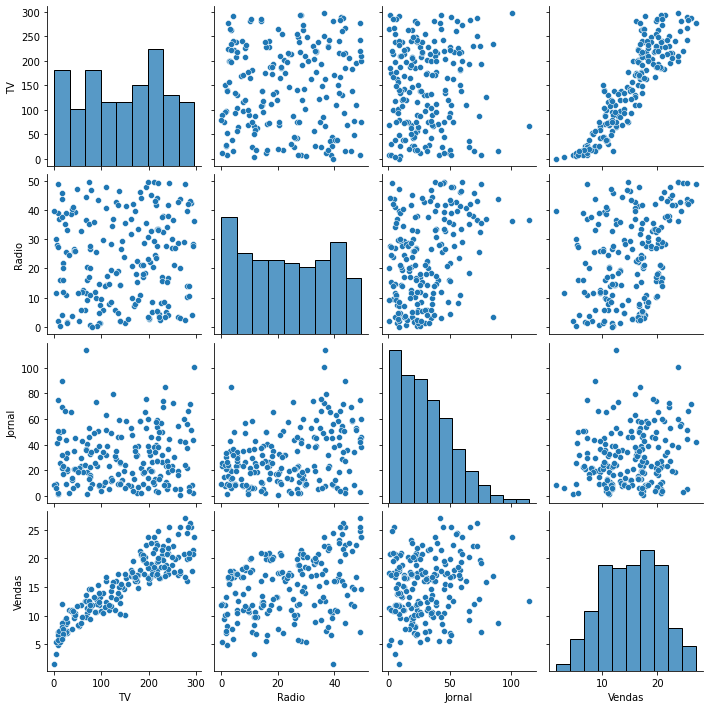

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(bd)
plt.show()

* Plotando um gráfico de calor que mostra a correlação(razão) entre as colunas da nossa base de dados

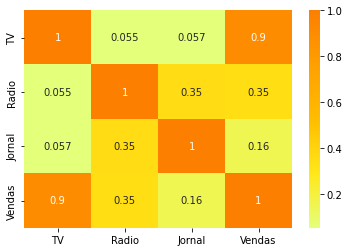

In [4]:
sns.heatmap(bd.corr(), cmap='Wistia', annot=True)
plt.show()

# **Criando o modelo**

* X ⇒ Valores de input (Todo o dataframe, com exceção da coluna 'Vendas')
* y ⇒ Valores de output ('Vendas')

* Explicando parte do código


```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)```
```
1. **X_train**: Variável para os dados de **TREINO** de X
2. **X_test**: Variável para os dados de **TESTE** de X
3. **y_train**: Variável para os dados de **TREINO** de y
4. **y_test**: Variável para os dados de **TESTE** de y
5. **train_test_split()**: Função que permite a divisão de dados entre **TREINO** e **TESTE**
6. **test_size**: Proporção de dados usados para teste e treino; No caso são 30%
7. **random_state**: Valor seed do aleatório



In [5]:
from sklearn.model_selection import train_test_split

X = bd.drop('Vendas', axis=1)
y = bd['Vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# **Treinando o nosso modelo**

* Métodos Utilizados (treino):
  * Regressão Linear
  * Random Forest Regressor

* Métodos Utilizados para Testar o Treinamento
  * R² (Porcentagem; Mais próximo de 1, melhor)
  * RSME (Quanto menor, melhor)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Treino IA
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

randomReg = RandomForestRegressor()
randomReg.fit(X_train, y_train)

# Teste IA
teste_predicao_linearReg = linearReg.predict(X_test)
teste_predicao_randomReg = randomReg.predict(X_test)

r2_linearReg = metrics.r2_score(y_test, teste_predicao_linearReg)
rmse_linearReg = np.sqrt(metrics.mean_squared_error(y_test, teste_predicao_linearReg))
print(f'R² da Regressão Linear: {r2_linearReg}\nRSME da Regressão Linear: {rmse_linearReg}\n\n')

r2_randomReg = metrics.r2_score(y_test, teste_predicao_randomReg)
rsme_randomReg = np.sqrt(metrics.mean_squared_error(y_test, teste_predicao_randomReg))
print(f'R² do Random Forest: {r2_randomReg}\nRSME do Random Forest: {rsme_randomReg}\n\n')

R² da Regressão Linear: 0.9071151423684272
RSME da Regressão Linear: 1.539694765603124


R² do Random Forest: 0.9643796489903705
RSME do Random Forest: 0.9534793040928232




# **Analisando os Resultados - Graficamente**

* Quantidade de Dados: **200** (`display(bd.info())`)
* Porcentagem da proporção Treino/Teste: **30%**
* Logo, a quantidade de pontos de teste no nosso gráfico será de **60** (pares ordenados/pontos); **30% * 200 = 60**

* Criaremos um novo *dataframe* com um gráfico comparando os **testes (dados reais)** com os dados previstos pelos modelos **Random Forest** e **Regressão Linear**

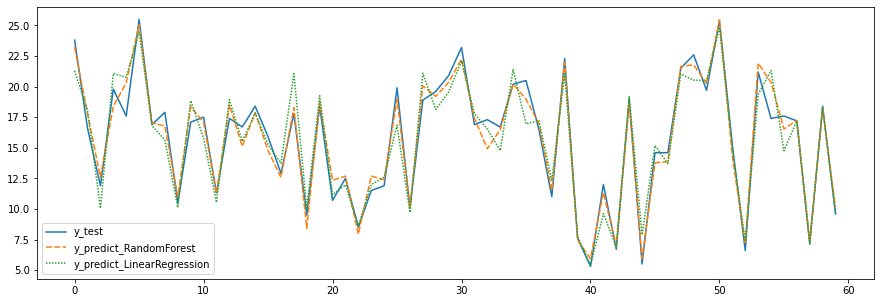

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   y_test                      60 non-null     float64
 1   y_predict_RandomForest      60 non-null     float64
 2   y_predict_LinearRegression  60 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


None

,y_test,y_predict_RandomForest,y_predict_LinearRegression
0,23.8,23.231,21.288161
1,16.6,17.797,18.042132
2,11.9,12.606,10.059590
3,19.8,18.394,21.082241
4,17.6,20.313,20.764760
5,25.5,25.064,24.471874
6,16.9,17.027,16.806436
7,17.9,16.781,15.628857
8,10.5,11.010,10.124799
9,17.1,18.370,18.846019


In [8]:
bd_resultado = pd.DataFrame()

bd_resultado['y_test'] = y_test
bd_resultado['y_predict_RandomForest'] = teste_predicao_randomReg
bd_resultado['y_predict_LinearRegression'] = teste_predicao_linearReg
bd_resultado = bd_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=bd_resultado)
plt.show()
display(bd_resultado.info())
display(bd_resultado)

* Importância/Correlação entre os investimentos nos canais **(TV, Radio e Jornal)** e as **Vendas**

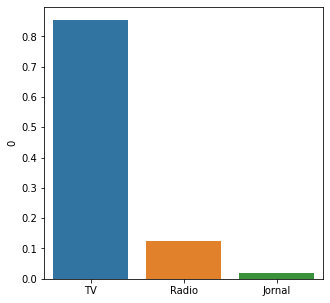

In [10]:
importancia_features = pd.DataFrame(randomReg.feature_importances_, X_train.columns)
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()

# **Deploy: Modo de Produção**

* Depois de termos criado o modelo e testado a eficiência do mesmo, chega o momento de colocarmos para rodar, ou em modo de produção, ou ainda, modo **Deploy**
* Basicamente, agora precisamos criar um sistema que possa ser executado por qualquer um que precise, tornando seu modelo escalável